# Exercise 3 : Exploratory Analysis

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [90]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Setup : Import the Dataset

Dataset from Kaggle : The **"House Prices"** competition     
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

The dataset is `train.csv`; hence we use the `read_csv` function from Pandas.  
Immediately after importing, take a quick look at the data using the `head` function.

In [91]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [92]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

---

## Problem 1 : Analysis of Numeric Variables

Extract the required variables from the dataset, as mentioned in the problem.     
`LotArea`, `GrLivArea`, `TotalBsmtSF`, `GarageArea`    

In [93]:
houseNumData = pd.DataFrame(houseData[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']])
houseNumData.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
0,8450,1710,856,548
1,9600,1262,1262,460
2,11250,1786,920,608
3,9550,1717,756,642
4,14260,2198,1145,836


### Check the Variables Independently

Summary Statistics of `houseNumData`, followed by Statistical Visualizations.      

In [94]:
houseNumData.describe()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1515.463699,1057.429452,472.980137
std,9981.264932,525.480383,438.705324,213.804841
min,1300.000000,334.000000,0.000000,0.000000
25%,7553.500000,1129.500000,795.750000,334.500000
50%,9478.500000,1464.000000,991.500000,480.000000
75%,11601.500000,1776.750000,1298.250000,576.000000
max,215245.000000,5642.000000,6110.000000,1418.000000


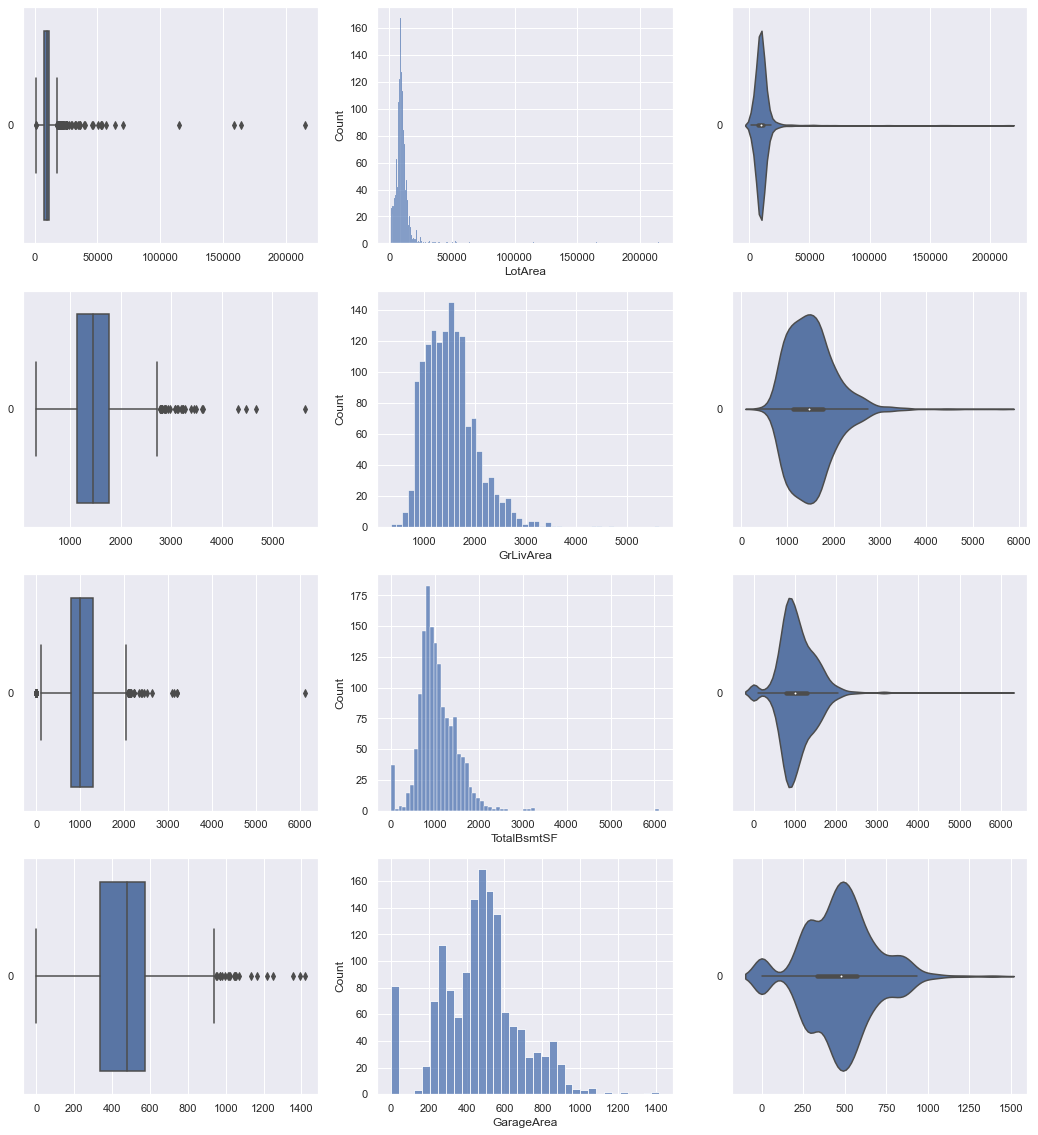

In [95]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 20))

count = 0
for var in houseNumData:
    sb.boxplot(data = houseNumData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = houseNumData[var], ax = axes[count,1])
    sb.violinplot(data = houseNumData[var], orient = "h", ax = axes[count,2])
    count += 1

Note that in the plots above, while the box-plot indicates the number of outliers a variable has (points outside the whiskers of the box-plot), the histogram and kde indicate the skewness of the variable distributions. Our job in this exercise is to count the outliers depicted in the box-plot, and find the skewness visible in the histogram and kde for each variable. At a first glance, it seems that `LotArea` is the one with highest number of outliers and maximum skew.

### Let's count the number of outliers in each variable

Remember the formula for the box-and-whiskers plot end-points to find the outliers.      
- Inter-Quartile Range $IQR$ = $Q3 - Q1$
- Lower whisker = $Q1 - 1.5 \times IQR$ = $Q1 - 1.5 \times (Q3 - Q1)$
- Upper whisker = $Q3 + 1.5 \times IQR$ = $Q3 + 1.5 \times (Q3 - Q1)$

In [96]:
# Calculate the quartiles
Q1 = houseNumData.quantile(0.25)
Q3 = houseNumData.quantile(0.75)

# Rule to identify outliers
rule = ((houseNumData < (Q1 - 1.5 * (Q3 - Q1))) | (houseNumData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
rule.sum()

LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
dtype: int64

Our guess from the box-plots was correct; `LotArea` indeed has the highest number of outliers. `TotalBsmtSF` is a close second.

### Let's compute the exact skewness for each variable

There is a one-stop function in pandas/numpy to compute the skewness of variables.    

In [97]:
# Compute the skewness
houseNumData.skew()

LotArea        12.207688
GrLivArea       1.366560
TotalBsmtSF     1.524255
GarageArea      0.179981
dtype: float64

Once again, our guess from the histograms and kdes was correct; `LotArea` indeed has the maximum skewness.   
*Pause and Ponder : If skewness tells you how skewed or lopsided a distribution is, what does `kurtosis` indicate?*

### Check the Relationships with SalePrice

Add `SalePrice` to the dataframe to check all Correlations and bi-variate Jointplots.

              LotArea  GrLivArea  TotalBsmtSF  GarageArea  SalePrice
LotArea      1.000000   0.263116     0.260833    0.180403   0.263843
GrLivArea    0.263116   1.000000     0.454868    0.468997   0.708624
TotalBsmtSF  0.260833   0.454868     1.000000    0.486665   0.613581
GarageArea   0.180403   0.468997     0.486665    1.000000   0.623431
SalePrice    0.263843   0.708624     0.613581    0.623431   1.000000


<AxesSubplot:>

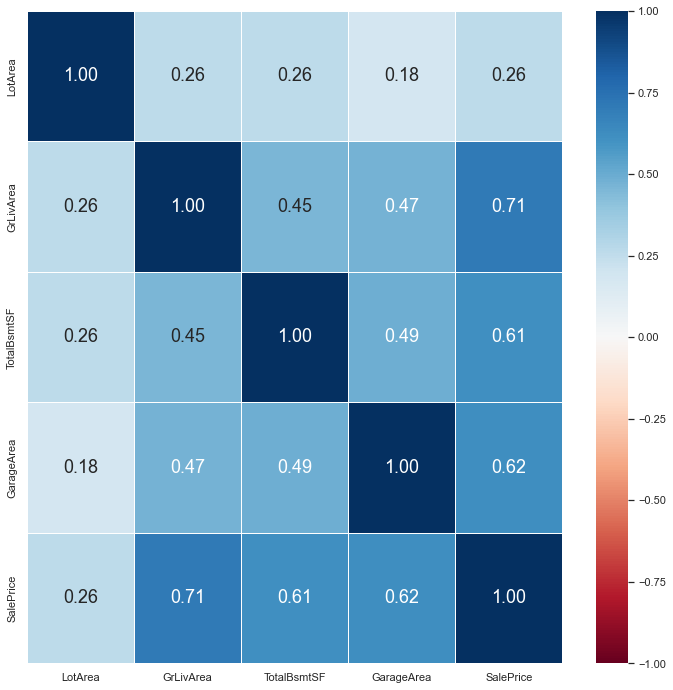

In [98]:
# Add SalePrice to the dataframe
houseNumData = pd.concat([houseNumData, houseData["SalePrice"]], axis = 1).reindex(houseNumData.index)

# Correlation Matrix
print(houseNumData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(houseNumData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

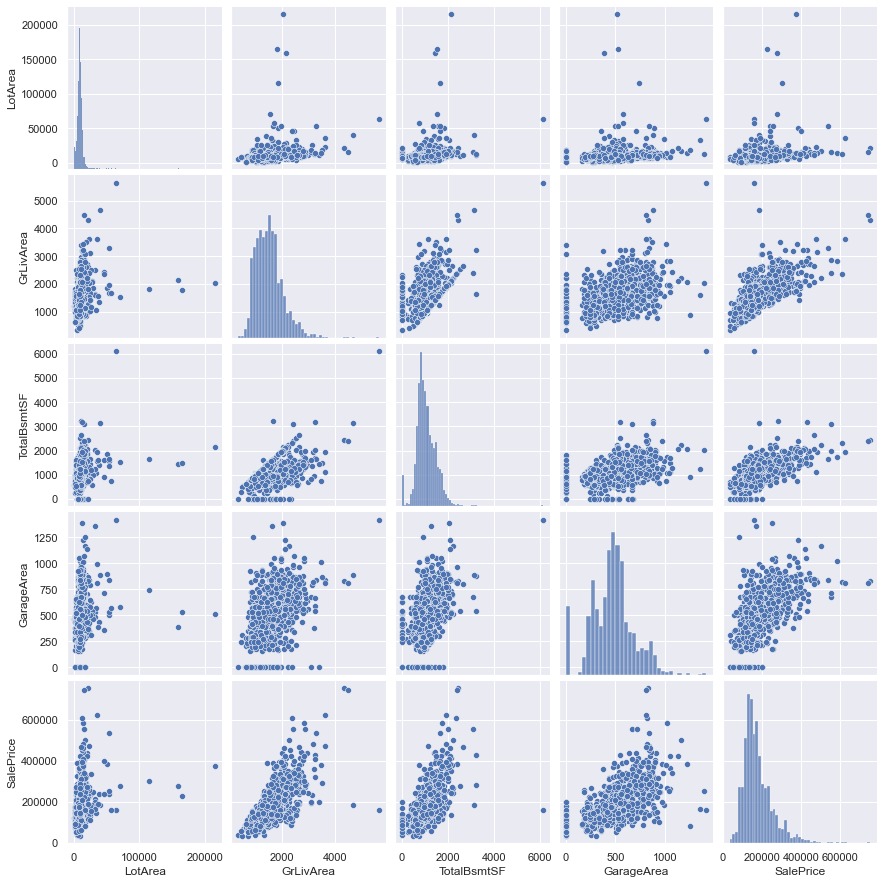

In [99]:
# Draw pairs of variables against one another
sb.pairplot(data = houseNumData)

**Observation : Which variables do you think will help us predict `SalePrice` in this dataset?**     

> `GrLivArea` : Possibly the most important variable : Highest Correlation, Strong Linearity    
> `GarageArea` and `TotalBsmtSF` : Important variables : High Correlation, Strong Linearity    
> `LotArea` : Doesn't seem so important as a variable : Low Correlation, Weak Linear Relation

Just from the above information, I would pick `GrLivArea` and `GarageArea` as the top two *individual* predictors, while `TotalBsmtSF` is a very close third option. However, as we will see in Multivariate Regression later, it is not clear which pair of variables amongst (`GrLivArea`, `GarageArea`) and (`GrLivArea`, `TotalBsmtSF`) is the best pair to predict `SalePrice` when we attempt a multivariate model. More on this topic will be discussed later.     

Bonus : Attempt a comprehensive analysis with all *Numeric* variables in the dataset if you can. Not too much fun, I understand, but may be useful.

---

## Problem 2 : Analysis of Categorical Variables

Extract the required variables from the dataset, as mentioned in the problem.     
`MSSubClass`, `Neighborhood`, `BldgType`, `OverallQual`

In [100]:
houseCatData = pd.DataFrame(houseData[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


Fix the data types of the extracted variables to convert them to categorical.

In [101]:
houseCatData = houseCatData.astype('category')

In [102]:
houseCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MSSubClass    1460 non-null   category
 1   Neighborhood  1460 non-null   category
 2   BldgType      1460 non-null   category
 3   OverallQual   1460 non-null   category
dtypes: category(4)
memory usage: 7.8 KB


### Check the Variables Independently

Summary Statistics of `houseCatData`, followed by Statistical Visualizations on the variables. 

In [103]:
houseCatData.describe()

,MSSubClass,Neighborhood,BldgType,OverallQual
count,1460,1460,1460,1460
unique,15,25,5,10
top,20,NAmes,1Fam,5
freq,536,225,1220,397


It is already clear from the `describe` table that
- `Neighborhood` has the highest number of levels as a categorical variable, total 25.    
- `Neighborhood` has the highest number of houses within the level `NAmes`, total 225.    

Note that you can also find these using `nunique` and `value_counts` on any column.

In [104]:
houseCatData["Neighborhood"].nunique()

25

In [105]:
houseCatData["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Well, you may also want to visualize the counts across levels of a categorical variable using `catplot`. Generally, the plot is sorted by the levels, but you can also sort the plot according to the count, as follows. It's helpful to do this in order to quickly get a feel for the distribution of data across the levels.

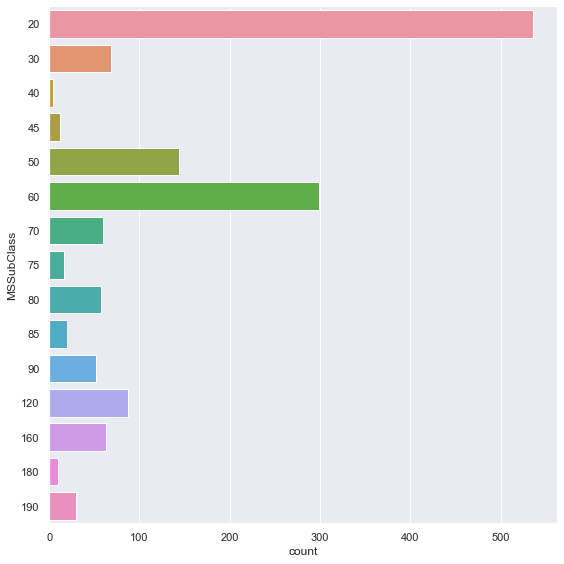

In [106]:
# Regular catplot for counts sorted by the levels
sb.catplot(y = 'MSSubClass', data = houseCatData, kind = "count", height = 8)

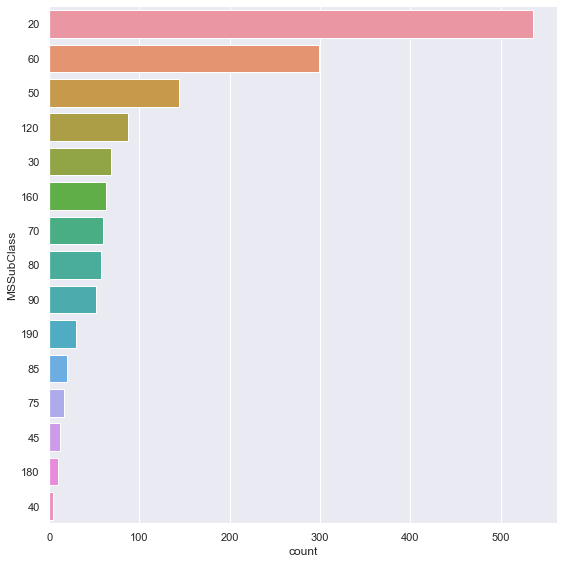

In [107]:
# Modified catplot for counts sorted by the counts
sb.catplot(y = 'MSSubClass', data = houseCatData, 
           kind = "count", 
           height = 8, 
           order = houseCatData['MSSubClass'].value_counts().index)

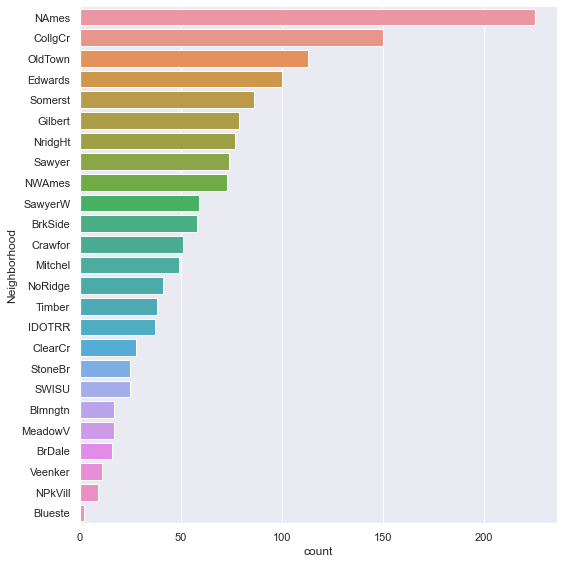

In [108]:
sb.catplot(y = 'Neighborhood', data = houseCatData, 
           kind = "count", 
           height = 8, 
           order = houseCatData['Neighborhood'].value_counts().index)

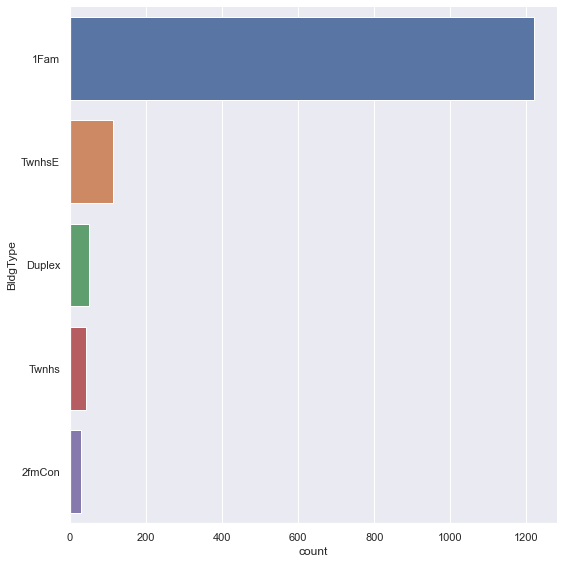

In [109]:
sb.catplot(y = 'BldgType', data = houseCatData, 
           kind = "count", 
           height = 8, 
           order = houseCatData['BldgType'].value_counts().index)

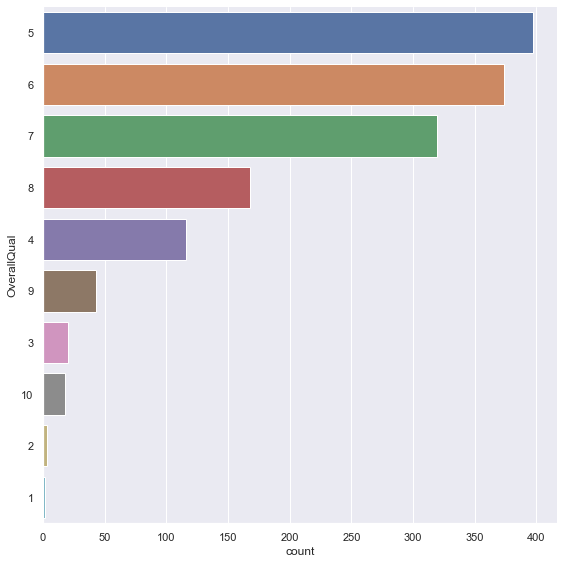

In [110]:
sb.catplot(y = 'OverallQual', data = houseCatData, 
           kind = "count", 
           height = 8, 
           order = houseCatData['OverallQual'].value_counts().index)

It's quite interesting to note that `OverallQual` is probably better represented sorted by levels, as follows, rather than by counts, as above. This is because there is an alternative *numeric* interpretation of `OverallQual`, especially significant for `SalePrice`. We will see the relationship shortly.

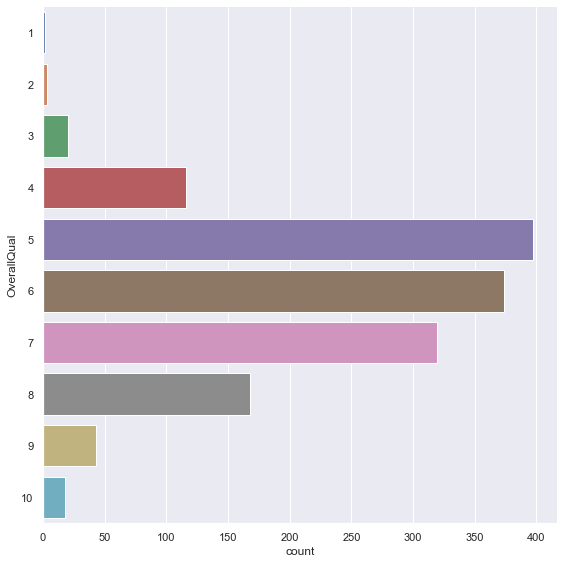

In [111]:
# Regular catplot for counts sorted by the levels
sb.catplot(y = 'OverallQual', data = houseCatData, kind = "count", height = 8)

### Check the effect of the Variables on SalePrice

Introduce `SalePrice` to the dataframe to find relationships with the variables.   

In [112]:
# Add SalePrice to the dataframe
houseCatData = pd.concat([houseCatData, houseData["SalePrice"]], axis = 1).reindex(houseCatData.index)
houseCatData.head()

,MSSubClass,Neighborhood,BldgType,OverallQual,SalePrice
0,60,CollgCr,1Fam,7,208500
1,20,Veenker,1Fam,6,181500
2,60,CollgCr,1Fam,7,223500
3,70,Crawfor,1Fam,7,140000
4,60,NoRidge,1Fam,8,250000


Check the distribution of `SalePrice` across different `MSSubClass`. Note that a simple box-plot with a numeric variable `SalePrice` on one axis and a categorical variable `MSSubClass` on another axis lets us split the numeric distribution across the categorical levels. This is great for interpretation.

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

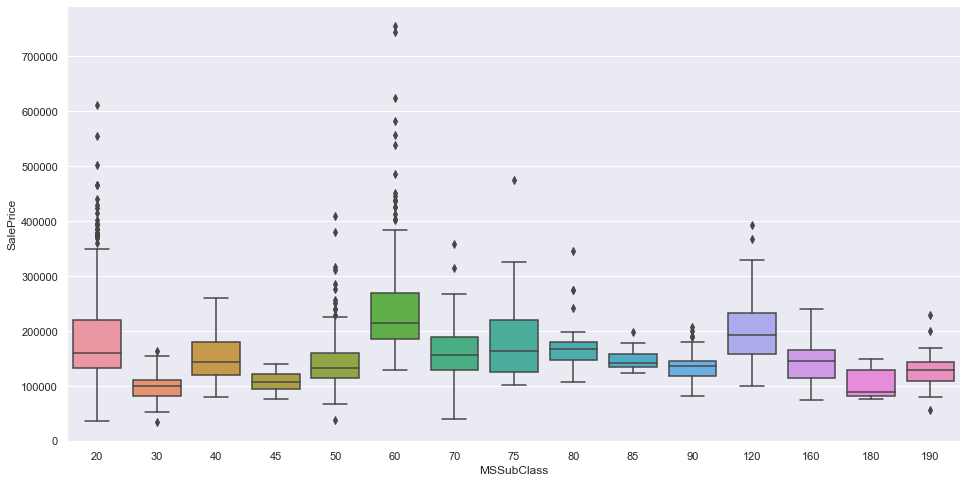

In [113]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'MSSubClass', y = 'SalePrice', data = houseCatData)

Well, it would probably be better to sort the boxplots in the figure above according to some statistic to see the relationship in a clearer fashion.

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

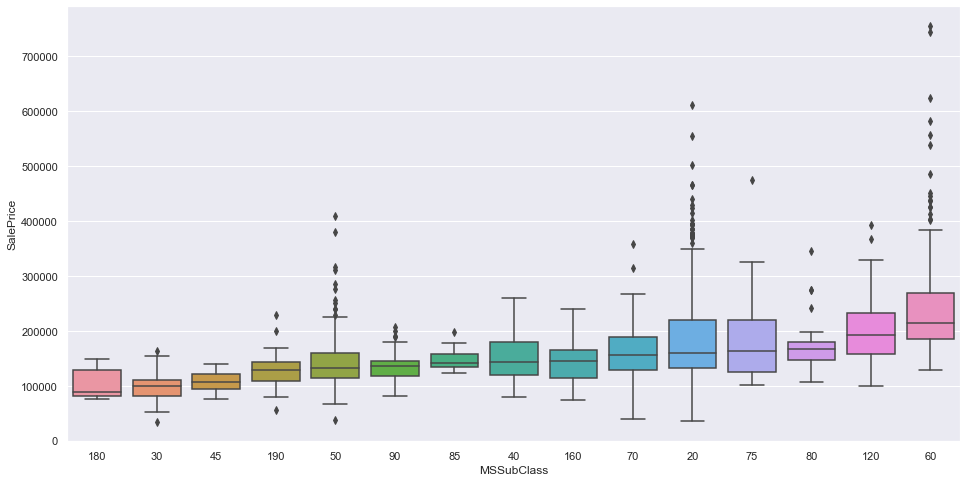

In [114]:
# Group SalePrice by the categorical variable to find the medians for each boxplot above and sort accordingly
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'MSSubClass', y = 'SalePrice', data = houseCatData, 
           order = houseCatData.groupby('MSSubClass')['SalePrice'].median().sort_values().index)

Check the distribution of `SalePrice` across different `Neighborhood`.

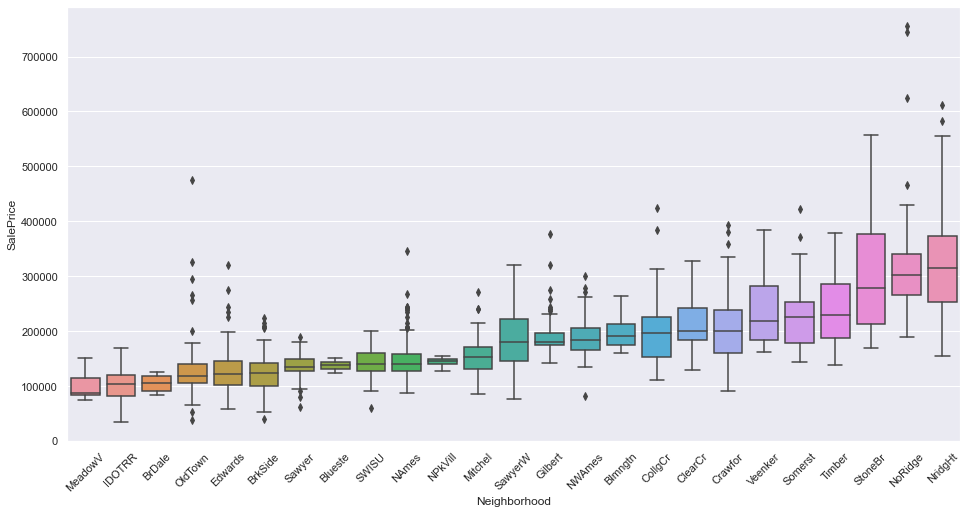

In [115]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'Neighborhood', y = 'SalePrice', data = houseCatData, 
           order = houseCatData.groupby('Neighborhood')['SalePrice'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

Check the distribution of `SalePrice` across different `BldgType`.

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

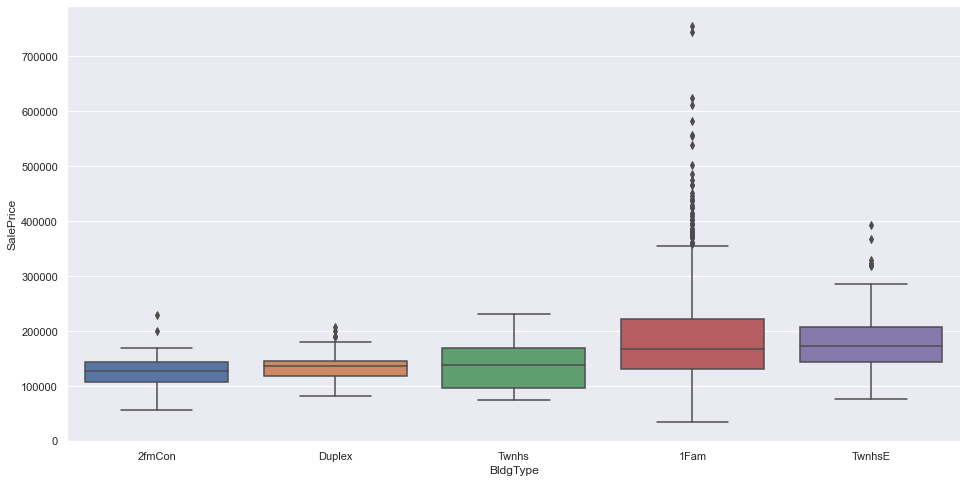

In [116]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'BldgType', y = 'SalePrice', data = houseCatData, 
           order = houseCatData.groupby('BldgType')['SalePrice'].median().sort_values().index)

Check the distribution of `SalePrice` across different `OverallQual`.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

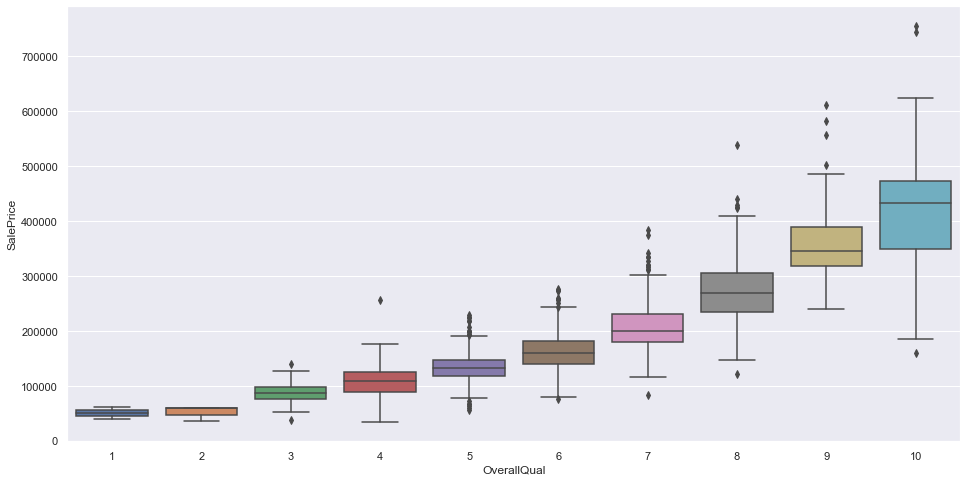

In [117]:
# Boxplots Sorted by Median
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'OverallQual', y = 'SalePrice', data = houseCatData, 
           order = houseCatData.groupby('OverallQual')['SalePrice'].median().sort_values().index)

Note that sorting by median is same as sorting by the levels, denoting a strong increasing trend of `SalePrice` with increase in `OverallQual`.

**Observation : Which variables do you think will help us predict `SalePrice` in this dataset?**     

> `OverallQual` : Definitely the most important variable : Highest variation in `SalePrice` boxplots across the categorical levels   
> `Neighborhood` and `MSSubClass` : Moderately important variables : Medium variation in `SalePrice` boxplots across levels   
> `BldgType` : Not clear if important as a variable at all : Not much variation in `SalePrice` boxplots across the categorical levels   

Just from the above information, I would pick `OverallQual` and `Neighborhood` as the top two *individual* predictors, while `MSSubClass` may be considered a third option. However, we will need further investigation in terms of the number of levels of categorical variables (to be discussed later).     

Bonus : Attempt a comprehensive analysis with all *Categorical* variables in the dataset if you can. Not too much fun, I understand, but may be useful.

---

## Problem 3 : Interesting questions based on EDA

### Does the SalePrice of a house get affected by whether it has a Garage or not?

**Approach** : Note that there are six variables in the dataset related to garages, as follows (from `info`). You may either look at the four with *missing values* (that is, with 1379 non-null) or you may consider the two that are full (that is, with 1460 non-null). Read the `data_description` file carefully to decide which one you want to pick. The final goal is to find which houses have garage and which ones don't. Any of these six variables may be helpful in this case.

```
 58  GarageType     1379 non-null   object 
 59  GarageYrBlt    1379 non-null   float64
 60  GarageFinish   1379 non-null   object 
 61  GarageCars     1460 non-null   int64  
 62  GarageArea     1460 non-null   int64  
 63  GarageQual     1379 non-null   object 
 64  GarageCond     1379 non-null   object 
```

Personally, I will pick `GarageCars` for this problem, as I observe the following characteristics of this variable.

In [118]:
houseData['GarageCars'].nunique()

5

Only 5 unique values of a numeric variable indicates that we may treat it as categorical instead. Let's try that.

In [119]:
numCars = houseData['GarageCars'].astype('category')
numCars.value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

Observation : Majority of houses have a 2-car garage, and 81 houses have no garage at all. This is consistent with 1379 non-null values in the four garage variables above, where the missing values must mean houses with no garage. The next step is to create a new variable to indicate existence of garage.

In [120]:
houseData["GarageExists"] = (houseData["GarageCars"] > 0)

In [121]:
houseData["GarageExists"].describe()

count     1460
unique       2
top       True
freq      1379
Name: GarageExists, dtype: object

Now it's time to check `SalePrice` of a house against this new variable `GarageExists` to see if garage matters in terms of the price of a house.

<AxesSubplot:xlabel='SalePrice', ylabel='GarageExists'>

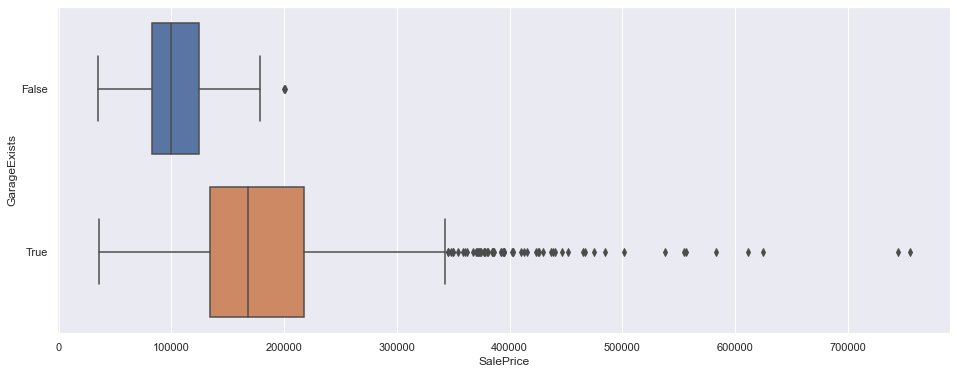

In [122]:
f = plt.figure(figsize=(16, 6))
sb.boxplot(x = 'SalePrice', y = 'GarageExists', data = houseData, orient = 'h')

**Observation** : The overall statistics of `SalePrice` is considerably higher for house with garages. In fact, Q1 of `SalePrice` for houses with garages is higher than Q3 of `SalePrice` for houses without garages. This is quite significant as a gap. If you want to be more sure of the disparity, you may also try to perform a *t-test*. However, this DOES NOT mean that just having a garage will score you a higher saleprice. There may be other reasons to this observation. For instance, houses with garages may have significantly higher living area or lot area, which results in a higher sale price. We do not know that yet. The only conclusion you may draw from the box-plot above is that **existence of garage has a relationship with sale price**. That's it!

### Does the SalePrice of a house get affected by how recently it got Remodeled?    

**Approach** : Note that there are three variables indicating Year in the data, as follows (from `info`). You should read the `data_description` file carefully to see which ones tell you about how recently the house got remodelled. Personally, I will start with `YearRemodAdd`, with no missing values.

```
 19  YearBuilt      1460 non-null   int64  
 20  YearRemodAdd   1460 non-null   int64 
 59  GarageYrBlt    1379 non-null   float64
 77  YrSold         1460 non-null   int64   
```

Note from the `data_description` file that while `YearBuilt` is the *original construction date*, `YearRemodAdd` is the *remodel date*, which is recorded in the dataset same as the construction date if no remodeling or additions have been added to the house since it was built. Thus, we need to consider the houses in two segments -- the ones that were remodelled and the ones that were not. I will only consider the ones remodelled in this case.

In [123]:
remodHouses = houseData[houseData["YearRemodAdd"] > houseData["YearBuilt"]].copy()
remodHouses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 2 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             696 non-null    int64  
 1   MSSubClass     696 non-null    int64  
 2   MSZoning       696 non-null    object 
 3   LotFrontage    596 non-null    float64
 4   LotArea        696 non-null    int64  
 5   Street         696 non-null    object 
 6   Alley          73 non-null     object 
 7   LotShape       696 non-null    object 
 8   LandContour    696 non-null    object 
 9   Utilities      696 non-null    object 
 10  LotConfig      696 non-null    object 
 11  LandSlope      696 non-null    object 
 12  Neighborhood   696 non-null    object 
 13  Condition1     696 non-null    object 
 14  Condition2     696 non-null    object 
 15  BldgType       696 non-null    object 
 16  HouseStyle     696 non-null    object 
 17  OverallQual    696 non-null    int64  
 18  OverallCo

We extracted the 696 houses from the dataset that have undergone remodelling after they were built. Let us now check the recency of remodeling by creating a variable to denote the age of remodeling for the houses in this dataset. Then we will compare that with `SalePrice` to find a relationship.

In [124]:
remodHouses["RemodAge"] = remodHouses["YrSold"] - remodHouses["YearRemodAdd"]
remodHouses["RemodAge"].describe()

count    696.000000
mean      21.178161
std       22.214517
min       -1.000000
25%        4.000000
50%       11.000000
75%       44.000000
max       60.000000
Name: RemodAge, dtype: float64

Well, it seems that there are houses that are remodelled *after* they were sold. Let's remove those for a clearer analysis in this case.

In [125]:
remodHouses = remodHouses[remodHouses["YrSold"] >= remodHouses["YearRemodAdd"]]
remodHouses["RemodAge"].describe()

count    695.000000
mean      21.210072
std       22.214546
min        0.000000
25%        4.000000
50%       11.000000
75%       44.000000
max       60.000000
Name: RemodAge, dtype: float64

Now it's time to check the relationship between `RemodAge` and `SalePrice`, using standard numeric correlation and jointplot.

In [126]:
remodHouses["RemodAge"].corr(remodHouses["SalePrice"])

-0.4502294083841028

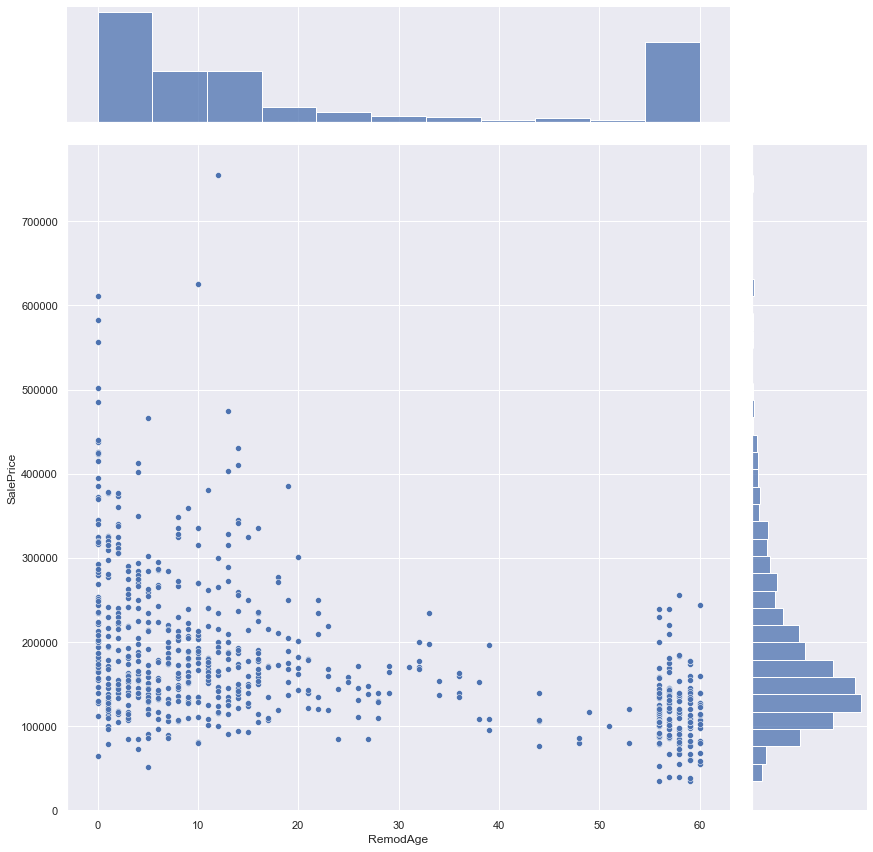

In [127]:
sb.jointplot(x = "RemodAge", y = "SalePrice", data = remodHouses, height = 12)

**Observation** : `SalePrice` seems to higher for houses that are remodelled recently. This is observed both from the jointplot and the decent negative correlation of -0.45 between `RemodAge` and `SalePrice`. However, this DOES NOT mean that just doing a recent remodeling to reduce the `RemodAge` will score you a higher saleprice. There may be other reasons to this observation. For instance, houses with recent remodeling may have introduced new features that result in a higher sale price. We do not know that yet. The only conclusion you may draw from the joint-plot and correlation above is that **recency of remodeling has some relationship with sale price**, and this may turn `RemodAge` into a nice predictor for `SalePrice`. That's it!